In [1]:
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv(r"C:\Users\gagan soni\Downloads\unsupervised_learning_dataset.csv")

In [3]:
df.drop(columns = ['CustomerID','Genre'],inplace = True)

In [4]:
df.rename(columns = {"Annual Income (k$)":'income','Spending Score (1-100)':'spending'},inplace = True)

In [5]:
df.head()

,Age,income,spending
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40


In [6]:
wcss = []
for k in range(1,11):
    from sklearn.cluster import KMeans
    kmeans = KMeans(n_clusters = k, init = 'k-means++')
    kmeans.fit(df[['Age','income']])
    wcss.append(kmeans.inertia_)
print(wcss)

[176108.78000000003, 87159.30436535942, 59486.961439280356, 39529.88796736351, 33297.45804836877, 28140.25701298701, 22549.141850100168, 19981.047035043797, 16223.329853384526, 14243.635781983692]


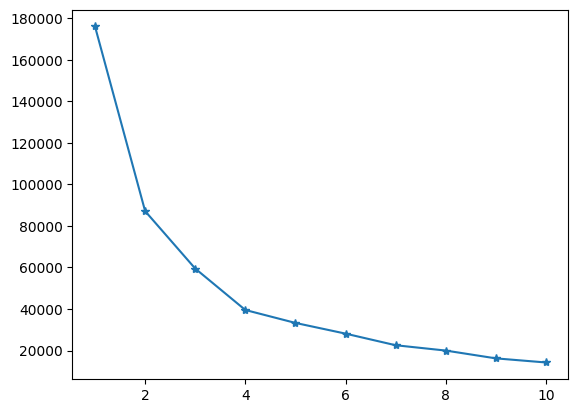

In [7]:
plt.plot(range(1,11),wcss,marker='*')
plt.show()

In [8]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters = 5 , init = 'k-means++',random_state = True)
df['km_cluster'] = kmeans.fit_predict(df[['Age','income']])

In [9]:
df['km_cluster']

0      2
1      2
2      2
3      2
4      2
      ..
195    1
196    1
197    1
198    1
199    1
Name: km_cluster, Length: 200, dtype: int32

<Axes: xlabel='Age', ylabel='income'>

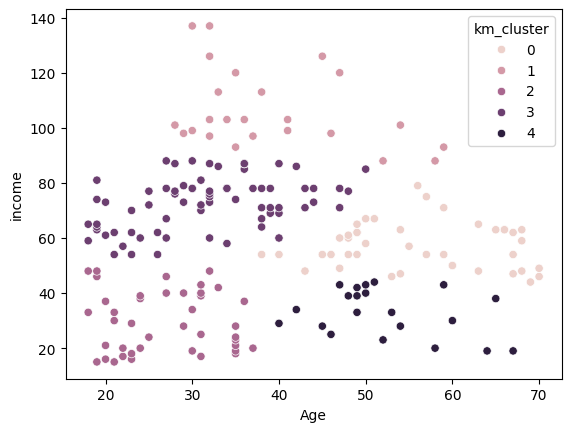

In [10]:
sns.scatterplot(x = 'Age',y = 'income',data = df,hue = 'km_cluster')